<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions-to-Evaluate-Models" data-toc-modified-id="Functions-to-Evaluate-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions to Evaluate Models</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span></li><li><span><a href="#Conclusion-from-round-of-modeling" data-toc-modified-id="Conclusion-from-round-of-modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion from round of modeling</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))


import joblib
import pickle

In [2]:
# Load the pickled csv files
# Uncomment the block.
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [3]:
X_train.shape

(69264, 9190)

In [5]:
X_train.head()

,Polarity,abs_pol,abandon,ability,able,abroad,absence,absolute,absolutely,abuse,...,Region_𓂀,Region_𝑩𝒓𝒊𝒙𝒕𝒐𝒏 𝑳𝒐𝒏𝒅𝒐𝒏,Region_𝕮𝖍𝖎𝖓𝖆𝕿𝖔𝖜𝖓 𝕷𝖔𝖓𝖉𝖔n,Region_𝗟𝗼𝗻𝗱𝗼𝗻 𝗘𝘀𝘀𝗲𝘅,Region_𝗡𝗢𝗧 in Wales right now,Region_𝙼𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛 𝚄𝙺,Region_𝚖𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛,Sentiment_-1,Sentiment_0,Sentiment_1
0,-0.741230,-0.633141,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,1.416099,-0.415971,-1.040313
1,-0.262475,-1.479113,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,1.416099,-0.415971,-1.040313
2,1.396220,1.374787,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,-0.706165,-0.415971,0.961249
3,-0.099226,-1.267701,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,-0.706165,-0.415971,0.961249
4,-0.566621,-0.941680,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,1.416099,-0.415971,-1.040313


In [9]:
X_train_mms = pd.read_pickle('X_train_mms.pkl')
X_test_mms = pd.read_pickle('X_test_mms.pkl')
y_train_mms = pd.read_pickle('y_train_mms.pkl')
y_test_mms = pd.read_pickle('y_test_mms.pkl')
X_train_mms.shape

(69264, 9190)

# Modeling

## Functions to Evaluate Models

In [11]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

def model_fitter(classifier, params):
    if classifier == nbc:
        X_train = X_train_mms
        y_train = y_train_mms
        X_test = X_test_mms
        y_test = y_test_mms
        
    model = GridSearchCV(classifier,params,cv=kf, verbose=2)
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    cv_score = model.best_score_
    test_score = model.score(X_test, y_test)
    return training_score,cv_score,test_score, model.best_params_, model.best_estimator_

In [5]:
scores = pd.DataFrame(columns=["Training score","Mean crossvalidated score", "Test score","Parameters"])

def compare_scores(model_name, model_scores):
    scores.loc[model_name] = model_scores

In [18]:
def evaluate(model):
    if model == nbc_model:
        X_train = X_train_mms
        y_train = y_train_mms
        X_test = X_test_mms
        y_test = y_test_mms
        
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # print classification report
    print(classification_report(y_train, predictions_train))
    print(classification_report(y_test, predictions_test))
    
    # plot confusion matrix
    fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12, 4), sharey=True)
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][0], normalize='true',colorbar=False)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][0], normalize='true',colorbar=False)
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][1],colorbar=False)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][1],colorbar=False)



In [19]:
def plot_curves(model):
    if model == nbc_model:
        X_train = X_train_mms
        y_train = y_train_mms
        X_test = X_test_mms
        y_test = y_test_mms
    cmap = ListedColormap(sns.color_palette("husl", len(model.classes_)))

    fig, ax =plt.subplots(ncols = 2, nrows=2, figsize=(12, 12))
    probabilities_train = model.predict_proba(X_train)
    probabilities_test = model.predict_proba(X_test)

    #plot train data
    skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, ax=ax[0][0])
    skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap, ax=ax[0][1])

    #plot test data
    skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap, ax=ax[1][0])
    skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap, ax=ax[1][1])

    plt.show()

In [8]:
def evaluate_coef(model):
    # create a dataframe to look at the coefficients and their values 
    coef_df = pd.DataFrame({'feature': X_train.columns,
                            'coef': model.coef_[0],
                            'abs_coef': np.abs(model.coef_[0])})

    # sort by absolute value of coefficient (magnitude)
    coef_df.sort_values('abs_coef', ascending=False, inplace=True)
    
    # plot the most significant coefficients
    coef_df.head(20).plot(kind='barh', x='feature', y='coef', figsize=(12, 12))
    plt.show()

## Logistic Regression

In [ ]:
# initiate Logistic Regression model and set parameters. 
#Call function to fit model and return scores, parameters and model

lr = LogisticRegression(verbose = 2)

# optimizes the model for large datasets
lr_params = {
    'solver' :['saga'],
    'penalty' : ['l1']
            }
lr_train, lr_cv, lr_test, lr_params, lr_model = model_fitter(lr, lr_params)

# save model to joblib pickle
joblib.dump(lr_model, 'logreg_model.pkl')
lr_scores = [lr_train,lr_cv, lr_test,lr_params]
print("Train score: ", lr_train, "Cross-val score: ", lr_cv, "Test score: ", lr_test)
lr_scores = [lr_train,lr_cv, lr_test,lr_params]

In [ ]:
lr_model = joblib.load('logreg_model.pkl')

In [14]:
# evaluate model
compare_scores("Logistic Regression with time and location",lr_scores)
scores

,Training score,Mean crossvalidated score,Test score,Parameters
Logistic Regression with time and location,0.867882,0.848594,0.848522,"{'penalty': 'l1', 'solver': 'saga'}"


              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     41521
         1.0       0.87      0.79      0.83     27743

    accuracy                           0.87     69264
   macro avg       0.87      0.85      0.86     69264
weighted avg       0.87      0.87      0.87     69264

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88     10290
         1.0       0.84      0.77      0.80      7026

    accuracy                           0.85     17316
   macro avg       0.85      0.84      0.84     17316
weighted avg       0.85      0.85      0.85     17316



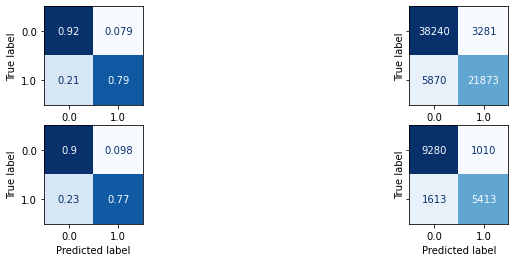

In [58]:
evaluate(lr_model)

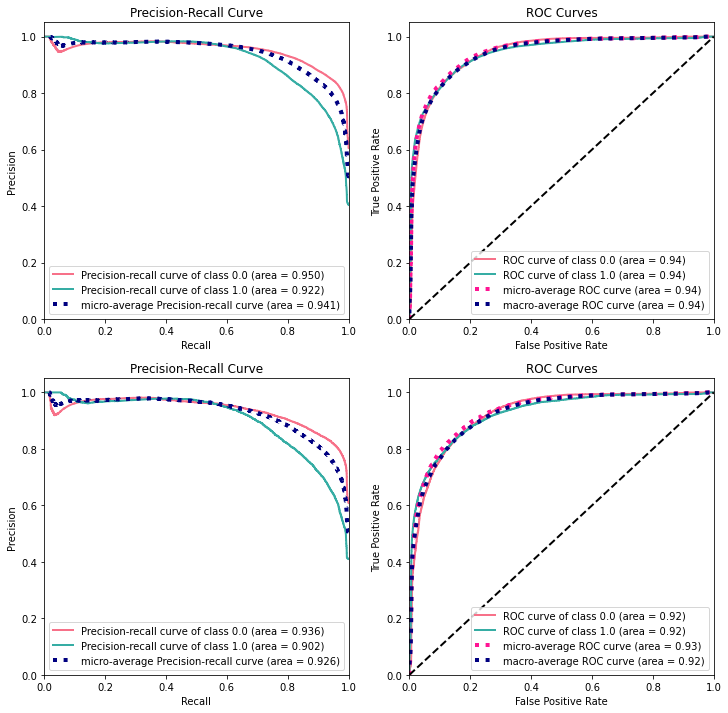

In [59]:
plot_curves(lr_model)

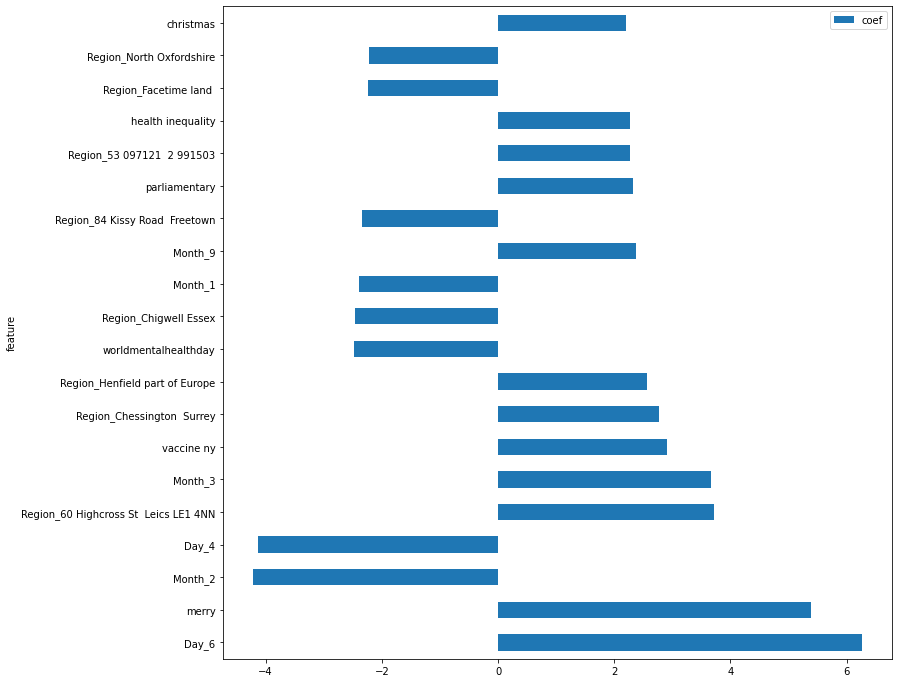

In [33]:
evaluate_coef(lr_model)

## Naive Bayes Classifier

In [12]:
# Naive Bayes Classifier
nbc = MultinomialNB()


# optimizes the model for large datasets
nbc_params = {}
nbc_train, nbc_cv, nbc_test, nbc_params, nbc_model = model_fitter(nbc, nbc_params)

#get scores
nbc_scores = [nbc_train,nbc_cv, nbc_test,nbc_params]

# save model to joblib pickle
joblib.dump(nbc_model, 'nbc_model_1.pkl')
print("Train score: ", nbc_train, "Cross-val score: ", nbc_cv, "Test score: ", nbc_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=   9.7s
[CV] END .................................................... total time=   9.9s
[CV] END .................................................... total time=   9.8s
[CV] END .................................................... total time=  10.0s
Train score:  0.8592486717486717 Cross-val score:  0.8386174912068656 Test score:  0.8406675906675907


In [15]:
compare_scores("Naive Bayes Classifier",nbc_scores)
scores

,Training score,Mean crossvalidated score,Test score,Parameters
Naive Bayes Classifier,0.859249,0.838617,0.840668,{}


              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     41521
         1.0       0.87      0.77      0.81     27743

    accuracy                           0.86     69264
   macro avg       0.86      0.84      0.85     69264
weighted avg       0.86      0.86      0.86     69264

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     10290
         1.0       0.84      0.75      0.79      7026

    accuracy                           0.84     17316
   macro avg       0.84      0.83      0.83     17316
weighted avg       0.84      0.84      0.84     17316



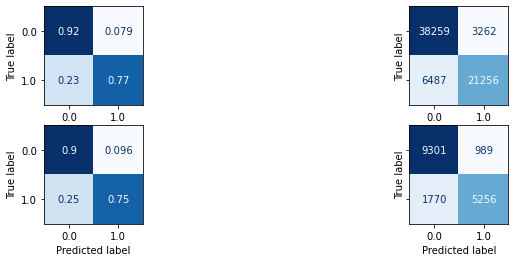

In [20]:
evaluate(nbc_model)

/Users/sharadakumaran/opt/anaconda3/envs/spacy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


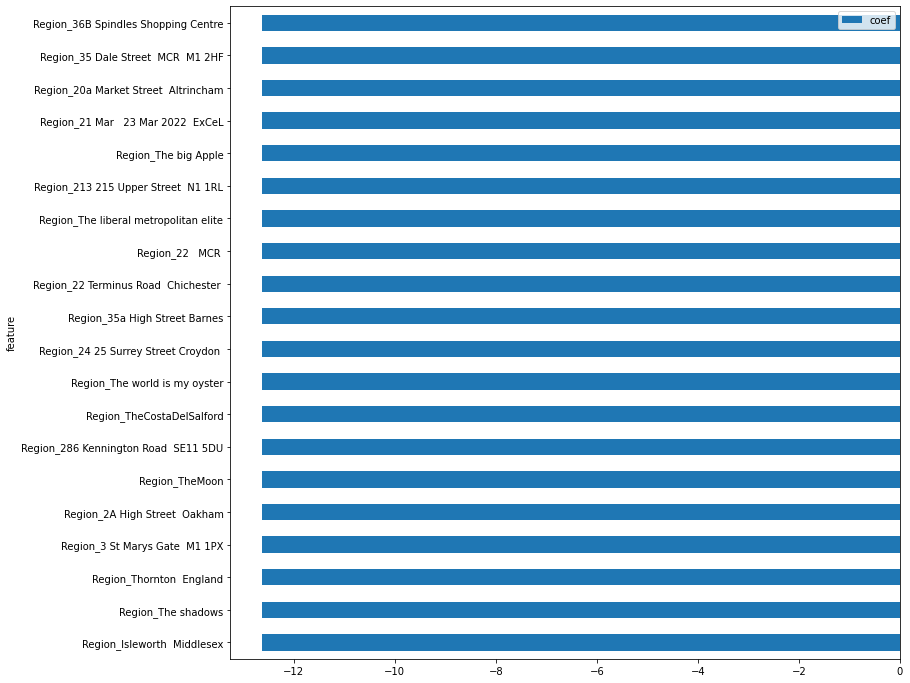

In [21]:
evaluate_coef(nbc_model)

## Conclusion from round of modeling
Looking at the coefficients from the Naive Bayes Classifier, it appears that Region is an inconclusive predictor even though the Naive Bayes Classifier scores are high. 
Region is also not a good predictor to include in the modeling if we want to use the model in other geographies and time.
In the next round of modeling, I will remove Region/Location features.